In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
warnings.filterwarnings('ignore')

In [3]:
# 한글꺠지는 것 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [6]:
df = pd.read_csv('C:/Users/wnrrh/desktop/0719.csv', encoding = 'utf-8', delimiter = ',')

# 데이터 전처리

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745877 entries, 0 to 4745876
Data columns (total 20 columns):
 #   Column     Dtype  
---  ------     -----  
 0   고객코드       object 
 1   영수증번호      object 
 2   채널구분       int64  
 3   제휴사        object 
 4   점포코드       object 
 5   상품코드       object 
 6   구매일자       int64  
 7   구매시간       int64  
 8   구매금액       int64  
 9   구매수량       float64
 10  타입         object 
 11  성별         object 
 12  연령대        object 
 13  거주지대분류코드   object 
 14  점포지역대분류코드  object 
 15  점포지역중분류코드  object 
 16  상품 소분류명    object 
 17  상품 대분류명    object 
 18  상품 중분류명    object 
 19  엘페이 결제이력   int64  
dtypes: float64(1), int64(5), object(14)
memory usage: 724.2+ MB


In [8]:
df.isnull().sum()

고객코드              0
영수증번호             0
채널구분              0
제휴사               0
점포코드         729023
상품코드         601488
구매일자              0
구매시간              0
구매금액              0
구매수량         353184
타입                0
성별                0
연령대               0
거주지대분류코드          0
점포지역대분류코드    729023
점포지역중분류코드    729023
상품 소분류명      601488
상품 대분류명      601488
상품 중분류명      601488
엘페이 결제이력          0
dtype: int64

In [9]:
# 결측치 0으로 채우기
df = df.fillna(0)

# 성별 EDA

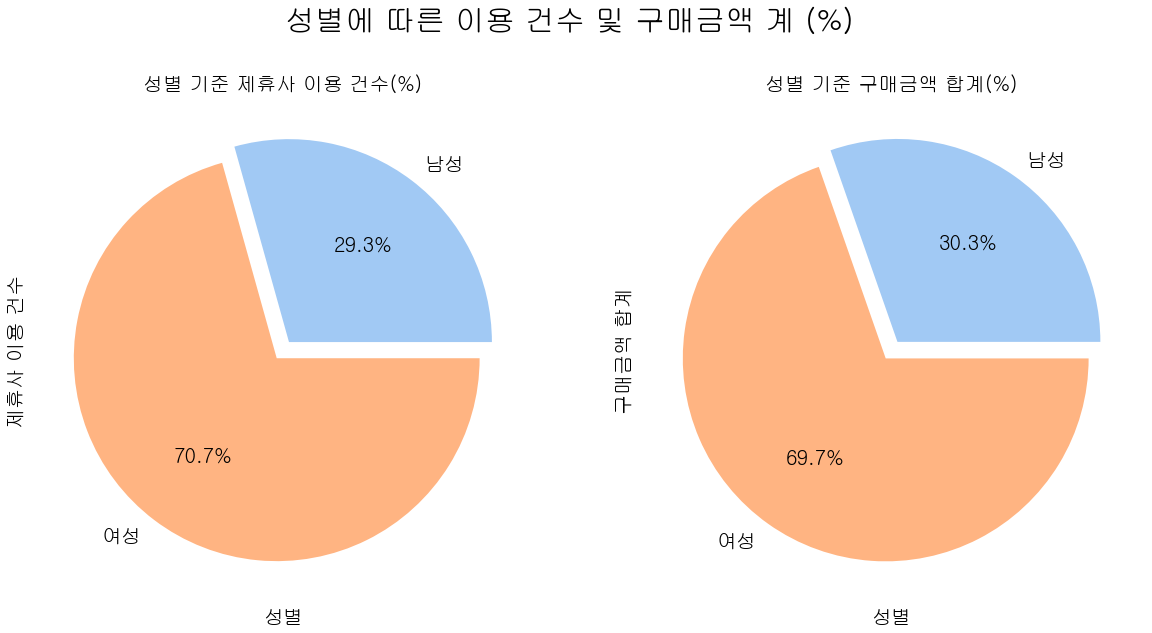

In [10]:
# 성별에 따른 제휴사 이용 건수 및 구매금액 
color = sns.color_palette('pastel')[:10]
a = df.groupby("성별")["고객코드"].count()
b = df.groupby("성별")["구매금액"].sum()

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title("성별 기준 제휴사 이용 건수(%)", fontsize=20)

a.plot(kind = 'pie', explode = [0.05, 0.05], autopct='%1.1f%%', textprops={'fontsize':20}, colors=color)
plt.xlabel('성별', fontsize=20)
plt.ylabel('제휴사 이용 건수',fontsize=20)

plt.subplot(1,2,2)
plt.title("성별 기준 구매금액 합계(%)", fontsize=20)

b.plot(kind = 'pie', explode = [0.05, 0.05], autopct='%1.1f%%', textprops={'fontsize' : 20}, colors=color)
plt.xlabel('성별', fontsize=20)
plt.ylabel('구매금액 합계', fontsize=20)

plt.suptitle('성별에 따른 이용 건수 및 구매금액 계 (%)', fontsize = 30)
plt.show()

In [11]:
# 성별 전처리
df['성별'] = df['성별'].replace('여성',1)
df['성별'] = df['성별'].replace('남성',0)

# 연령대 EDA

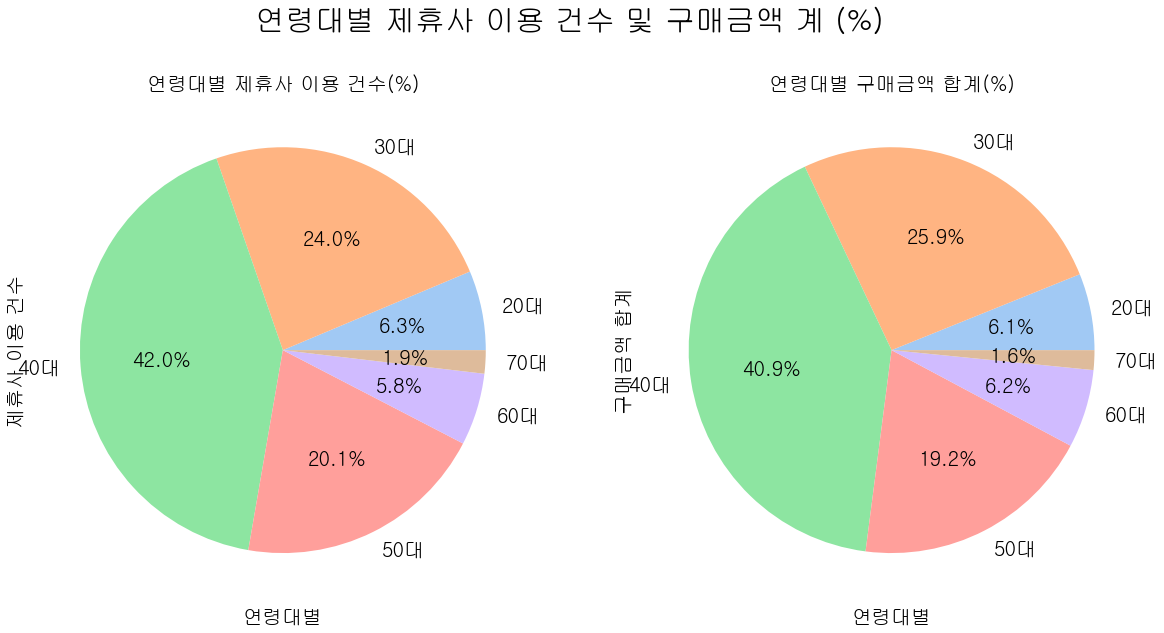

In [12]:
# 연령대별 제휴사 이용 건수 및 구매금액 합계
a = df.groupby("연령대")["고객코드"].count()
b = df.groupby("연령대")["구매금액"].sum()

plt.figure(figsize =(20,10))

plt.subplot(1,2,1)
plt.title("연령대별 제휴사 이용 건수(%)", fontsize=20)
a.plot(kind = 'pie', autopct='%1.1f%%', textprops= {'fontsize':20}, colors=color)
plt.xlabel('연령대별', fontsize=20)
plt.ylabel('제휴사 이용 건수',fontsize=20)

plt.subplot(1,2,2)
plt.title("연령대별 구매금액 합계(%)", fontsize=20)
b.plot(kind = 'pie', autopct='%1.1f%%', textprops= {'fontsize':20}, colors=color)
plt.xlabel('연령대별', fontsize=20)
plt.ylabel('구매금액 합계', fontsize=20)

plt.suptitle('연령대별 제휴사 이용 건수 및 구매금액 계 (%)', fontsize = 30)
plt.show()

In [13]:
df['연령대'] = df['연령대'].astype('str')

In [14]:
# 연령대 전처리
def change_age(text:str):
    return text[:2]
df['연령대'] = df['연령대'].map(change_age).astype(int)

In [15]:
# 구매수량 전처리
df['구매수량'] = df['구매수량'].astype('int')
# 구매일자 전처리
df['구매일자'] = df['구매일자'].astype('str')
df['year'] = df['구매일자'].str[0:4]
df['month'] = df['구매일자'].str[4:6]
df['day'] = df['구매일자'].str[6:]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745877 entries, 0 to 4745876
Data columns (total 23 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   고객코드       object
 1   영수증번호      object
 2   채널구분       int64 
 3   제휴사        object
 4   점포코드       object
 5   상품코드       object
 6   구매일자       object
 7   구매시간       int64 
 8   구매금액       int64 
 9   구매수량       int32 
 10  타입         object
 11  성별         int64 
 12  연령대        int32 
 13  거주지대분류코드   object
 14  점포지역대분류코드  object
 15  점포지역중분류코드  object
 16  상품 소분류명    object
 17  상품 대분류명    object
 18  상품 중분류명    object
 19  엘페이 결제이력   int64 
 20  year       object
 21  month      object
 22  day        object
dtypes: int32(2), int64(5), object(16)
memory usage: 796.6+ MB


In [17]:
# 날짜 관련 처리
df['year'] = df['year'].astype('int')
df['month'] = df['month'].astype('int')
df['day'] = df['day'].astype('int')
df.drop(['구매일자'],axis=1,inplace=True)

In [ ]:
# 바로배송 가능 파생변수 생성
for i in df.index:
    if df.loc[i,'거주지대분류코드'] == df.loc[i,'점포지역대분류코드'] :
        df.loc[i,'바로배송 가능여부'] = 1
    else: 
        df.loc[i,'바로배송 가능여부'] = 0

In [18]:
df

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매시간,구매금액,구매수량,타입,...,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 대분류명,상품 중분류명,엘페이 결제이력,year,month,day
0,M430112881,A01000001113,1,A01,A010039,PD0290,10,15000,1,Product,...,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,0,2021,1,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,10,79700,1,Product,...,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품,0,2021,1,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,10,19000,1,Product,...,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,0,2021,1,1
3,M430112881,A01000004946,1,A01,A010039,PD0290,10,19000,1,Product,...,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,0,2021,1,1
4,M430112881,A01000005297,1,A01,A010039,PD1692,10,9900,1,Product,...,Z17,Z10,Z10042,커피/음료,테넌트/음식점,식당,0,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745872,M470112503,210125110644545.0,2,A06,0,0,11,51800,0,Lpay,...,Z16,0,0,0,0,0,1,2021,1,25
4745873,M470112503,210104210652271.0,2,A06,0,0,21,6440,0,Lpay,...,Z16,0,0,0,0,0,1,2021,1,4
4745874,M748878049,210119200278240.0,1,A02,0,0,20,17600,0,Lpay,...,Z10,0,0,0,0,0,1,2021,1,19
4745875,M748878049,210119180267206.0,1,A02,0,0,18,12400,0,Lpay,...,Z10,0,0,0,0,0,1,2021,1,19


In [ ]:
df.drop(['거주지대분류코드', '점포지역대분류코드'],axis=1,inplace=True)

In [ ]:
df['바로배송 가능여부'] = df['바로배송 가능여부'].astype('int')

In [7]:
df = pd.read_csv('C:/Users/wnrrh/desktop/0718.csv', encoding = 'utf-8', delimiter = ',')

In [8]:
# 날짜 기준 오름차순정렬
df.sort_values(['year', 'month', 'day'], ascending = [True, True, True])

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매시간,구매금액,구매수량,타입,...,연령대,점포지역중분류코드,상품 소분류명,상품 대분류명,상품 중분류명,엘페이 결제이력,year,month,day,바로배송 가능여부
4241800,M495972460,20122713C012328716,2,C01,C010004,0,13,26000,0,Affiliate,...,40,Z17011,0,0,0,0,2020,12,27,0
4168101,M192531170,20122900C013317930,2,C01,C010026,0,0,10000,0,Affiliate,...,40,Z10011,0,0,0,0,2020,12,29,1
4340152,M039320884,20122911C011862577,2,C01,C010117,0,11,6500,0,Affiliate,...,40,Z06013,0,0,0,0,2020,12,29,1
4150396,M032911167,20123022C013819502,2,C01,C010040,0,22,12000,0,Affiliate,...,50,Z10026,0,0,0,0,2020,12,30,1
4175482,M696906664,20123019C015366364,2,C01,C010086,0,19,6500,0,Affiliate,...,40,Z14004,0,0,0,0,2020,12,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456632,M854444204,211231100083792.0,2,L00,0,0,10,2700,0,Lpay,...,30,0,0,0,0,1,2021,12,31,0
4456633,M340823796,211231170020146.0,2,L00,0,0,17,8190,0,Lpay,...,50,0,0,0,0,1,2021,12,31,0
4456634,M340823796,211231200136633.0,2,L01,0,0,20,100,0,Lpay,...,50,0,0,0,0,1,2021,12,31,0
4456635,M583982269,211231200133685.0,2,D01,0,0,20,13400,0,Lpay,...,50,0,0,0,0,1,2021,12,31,0


In [9]:
print(len(df.고객코드.unique()))
print(len(df.영수증번호.unique()))

29874
1868077


In [10]:
df.제휴사.value_counts(sort=True)

A02    2273569
A03     875031
A01     724155
A04     328942
A06     160223
D01     125333
L01      70939
C01      59644
D02      47384
C02      32067
L00      22526
A05      10466
B01       8872
E01       6726
Name: 제휴사, dtype: int64

In [97]:
# 제휴사 기준 평균구매금액 그룹화
dm_제휴사 = df.groupby('제휴사')['구매금액'].agg(**{'평균구매금액':'mean'}).sort_values("평균구매금액", ascending=True)
dm_제휴사

,평균구매금액
제휴사,
A04,3666
A03,4427
A02,7394
D02,10013
D01,10348
C01,11617
C02,20919
E01,49677
A06,55551


In [119]:
# 점포 기준 평균구매금액 그룹화
pd.options.display.float_format = '{:.0f}'.format
dm_점포 = df.groupby(['점포코드','점포지역중분류코드'])['구매금액'].agg(**{'평균구매금액':'mean'}).sort_values("평균구매금액", ascending=True)
dm_점포

,,평균구매금액
점포코드,점포지역중분류코드,
A040974,Z17003,400
A041447,Z10035,500
A040018,Z17017,500
A044756,Z16003,500
A045576,Z12006,500
...,...,...
A050099,Z10011,1191350
A050380,Z14007,1223267
A050154,Z10002,1331411


In [99]:
# 상품 기준 평균구매금액 그룹화
pd.options.display.float_format = '{:.0f}'.format
dm_상품 = df.groupby(['상품코드', '상품 소분류명', '상품 중분류명', '상품 대분류명'])['구매금액'].agg(**{'평균구매금액':'mean'}).sort_values("평균구매금액", ascending=False)
dm_상품

,,,,평균구매금액
상품코드,상품 소분류명,상품 중분류명,상품 대분류명,
PD0519,그림/인테리어렌탈,렌탈서비스,생활/렌탈서비스,8333333
PD1756,시계세트,시계,패션잡화,4461695
PD1752,남성시계,시계,패션잡화,3999031
PD0527,핸드폰충전,생활서비스,생활/렌탈서비스,3605000
PD0343,냉장/냉동가전소모품,냉장/냉동고,냉장/세탁가전,3468834
...,...,...,...,...
PD0382,담배관련용품,일반담배,담배,728
PD0446,봉투류,사무용지/서식지,문구/사무용품,690
PD0216,풍선껌,껌,과자,622


In [100]:
# 타입 기준 평균구매금액 그룹화
pd.options.display.float_format = '{:.0f}'.format
dm_type = df.groupby(['타입'])['구매금액'].agg(**{'평균구매금액':'mean'}).sort_values("평균구매금액", ascending=True)
dm_type

,평균구매금액
타입,
Affiliate,20131
Product,24007
Lpay,60812


In [101]:
dm_제휴사.reset_index(drop=False, inplace=True)
dm_점포.reset_index(drop=False, inplace=True)
dm_상품.reset_index(drop=False, inplace=True)
dm_type.reset_index(drop=False, inplace=True)

In [102]:
# 인덱스 값 만들어주기
dm_제휴사.reset_index(drop=False, inplace=True)
dm_점포.reset_index(drop=False, inplace=True)
dm_상품.reset_index(drop=False, inplace=True)
dm_type.reset_index(drop=False, inplace=True)

In [103]:
# 결측치를 0으로 처리한 의미를 두기 위해
dm_제휴사['index'] += 1
dm_점포['index'] += 1
dm_상품['index'] += 1
dm_type['index'] += 1

In [104]:
dm_제휴사.rename(columns = {'index':'제휴사_인덱스'}, inplace=True)
dm_점포.rename(columns = {'index':'점포_인덱스'}, inplace=True)
dm_상품.rename(columns = {'index':'상품_인덱스'}, inplace=True)
dm_type.rename(columns = {'index':'타입_인덱스'}, inplace=True)

In [105]:
dm_type

,타입_인덱스,타입,평균구매금액
0,1,Affiliate,20131
1,2,Product,24007
2,3,Lpay,60812


# 제휴사 처리

In [106]:
df2 = pd.merge(df,dm_제휴사, on=['제휴사'],how = 'left')

In [107]:
df2.drop(['평균구매금액', '제휴사'],axis=1,inplace=True)

# 점포 처리

In [109]:
df3 = pd.merge(df2,dm_점포, on =['점포코드', '점포지역중분류코드'], how='left')

In [110]:
df3.drop(['점포코드','점포지역중분류코드','평균구매금액'],axis=1, inplace=True)

In [111]:
df3

,고객코드,영수증번호,채널구분,상품코드,구매시간,구매금액,구매수량,타입,성별,연령대,상품 소분류명,상품 대분류명,상품 중분류명,엘페이 결제이력,year,month,day,바로배송 가능여부,제휴사_인덱스,점포_인덱스
0,M430112881,A01000001113,1,PD0290,10,15000,1,Product,1,50,남성티셔츠,남성의류,남성의류상의,0,2021,1,1,0,12,8319
1,M646853852,A01000002265,1,PD1369,10,79700,1,Product,1,40,기타주방일회용품,주방잡화,주방일회용품,0,2021,1,1,1,12,8314
2,M430112881,A01000003148,1,PD0290,10,19000,1,Product,1,50,남성티셔츠,남성의류,남성의류상의,0,2021,1,1,0,12,8319
3,M430112881,A01000004946,1,PD0290,10,19000,1,Product,1,50,남성티셔츠,남성의류,남성의류상의,0,2021,1,1,0,12,8319
4,M430112881,A01000005297,1,PD1692,10,9900,1,Product,1,50,커피/음료,테넌트/음식점,식당,0,2021,1,1,0,12,8319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745872,M470112503,210125110644545,2,0,11,51800,0,Lpay,1,50,0,0,0,1,2021,1,25,0,9,8294
4745873,M470112503,210104210652271,2,0,21,6440,0,Lpay,1,50,0,0,0,1,2021,1,4,0,9,8294
4745874,M748878049,210119200278240,1,0,20,17600,0,Lpay,1,30,0,0,0,1,2021,1,19,0,3,8294
4745875,M748878049,210119180267206,1,0,18,12400,0,Lpay,1,30,0,0,0,1,2021,1,19,0,3,8294


# 상품 처리

In [112]:
df4 = pd.merge(df3, dm_상품, on = ['상품코드','상품 소분류명','상품 중분류명','상품 대분류명'], how = 'left')

In [113]:
df4.drop(['상품코드','상품 소분류명','상품 중분류명','상품 대분류명','평균구매금액'],axis=1, inplace=True)

# 타입 처리

In [114]:
df5 = pd.merge(df4, dm_type, on=['타입'], how = 'left')

In [116]:
df5.drop(['타입', '평균구매금액'], axis=1, inplace=True)

# 고객코드, 영수증번호 인덱스 처리 후 병합

In [134]:
# 점포 기준 평균구매금액 그룹화
pd.options.display.float_format = '{:.0f}'.format
dm_고객 = df.groupby(['고객코드'])['구매금액'].agg(**{'평균구매금액':'mean'}).sort_values("평균구매금액", ascending=True)
dm_고객

,평균구매금액
고객코드,
M506952337,10
M228692984,100
M836523978,100
M630108944,100
M109052062,100
...,...
M022900850,3571225
M929502609,3885503
M621699711,4032594


In [135]:
# 점포 기준 평균구매금액 그룹화
pd.options.display.float_format = '{:.0f}'.format
dm_영수증 = df.groupby(['영수증번호'])['구매금액'].agg(**{'평균구매금액':'mean'}).sort_values("평균구매금액", ascending=True)
dm_영수증

,평균구매금액
영수증번호,
21061115C022916363,1
21031614E013123310,2
21092923E011529400,2
21022119E011025418,2
210627120185788.0,5
...,...
A01271693329,55680000
A01275514864,55680000
21022719B010855120,59090000


In [136]:
dm_고객.reset_index(drop=False,inplace=True)
dm_영수증.reset_index(drop=False,inplace=True)

In [137]:
dm_고객.reset_index(drop=False,inplace=True)
dm_영수증.reset_index(drop=False,inplace=True)

In [138]:
dm_고객['index'] += 1
dm_영수증['index'] += 1

In [139]:
dm_고객.rename(columns = {'index':'고객_인덱스'}, inplace=True)
dm_영수증.rename(columns = {'index':'영수증_인덱스'}, inplace=True)

In [140]:
df6 = pd.merge(df5, dm_고객, on=['고객코드'], how = 'left')

In [141]:
df6.drop(['평균구매금액','고객코드'],axis=1,inplace=True)

In [143]:
df7 = pd.merge(df6, dm_영수증, on=['영수증번호'], how = 'left')

In [145]:
df7.drop(['평균구매금액', '영수증번호'],axis=1,inplace=True)

In [155]:
df = df7.copy()

In [166]:
df.rename(columns = {'고객_인덱스':'고객코드', '영수증_인덱스':'영수증번호', '제휴사_인덱스':'제휴사','점포_인덱스':'점포정보','상품_인덱스':'상품정보','타입_인덱스':'타입','구매시간':'time'},inplace=True)

In [167]:
df = df[['고객코드','연령대','성별','영수증번호','제휴사','점포정보','상품정보','채널구분','타입','year','month','day','time','구매수량','엘페이 결제이력','바로배송 가능여부','구매금액']]

In [168]:
# 전처리 종료

In [169]:
df.to_csv('C:/Users/wnrrh/desktop/태준/롯데멤버스/0720.csv', encoding = 'utf-8', index=False)

# 모델링 전 상관계수 분석

In [11]:
df = pd.read_csv('C:/Users/wnrrh/desktop/태준/롯데멤버스/0720.csv', encoding = 'utf-8', delimiter = ',')

In [12]:
df

,고객코드,연령대,성별,영수증번호,제휴사,점포정보,상품정보,채널구분,타입,year,month,day,time,구매수량,엘페이 결제이력,바로배송 가능여부,구매금액
0,6675,50,1,1183452,12,8319,385,1,2,2021,1,1,10,1,0,0,15000
1,19570,40,1,1682307,12,8314,1002,1,2,2021,1,1,10,1,0,1,79700
2,6675,50,1,1274523,12,8319,385,1,2,2021,1,1,10,1,0,0,19000
3,6675,50,1,1274533,12,8319,385,1,2,2021,1,1,10,1,0,0,19000
4,6675,50,1,986839,12,8319,1415,1,2,2021,1,1,10,1,0,0,9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745872,10182,50,1,1589798,9,8294,629,2,3,2021,1,25,11,0,1,0,51800
4745873,10182,50,1,755709,9,8294,629,2,3,2021,1,4,21,0,1,0,6440
4745874,20079,30,1,1243335,3,8294,629,1,3,2021,1,19,20,0,1,0,17600
4745875,20079,30,1,1109410,3,8294,629,1,3,2021,1,19,18,0,1,0,12400


In [13]:
df_aff = df[df['타입'] == 1]

In [14]:
df_aff['바로배송 가능여부'].value_counts()

1    147853
0    100451
Name: 바로배송 가능여부, dtype: int64

<AxesSubplot:>

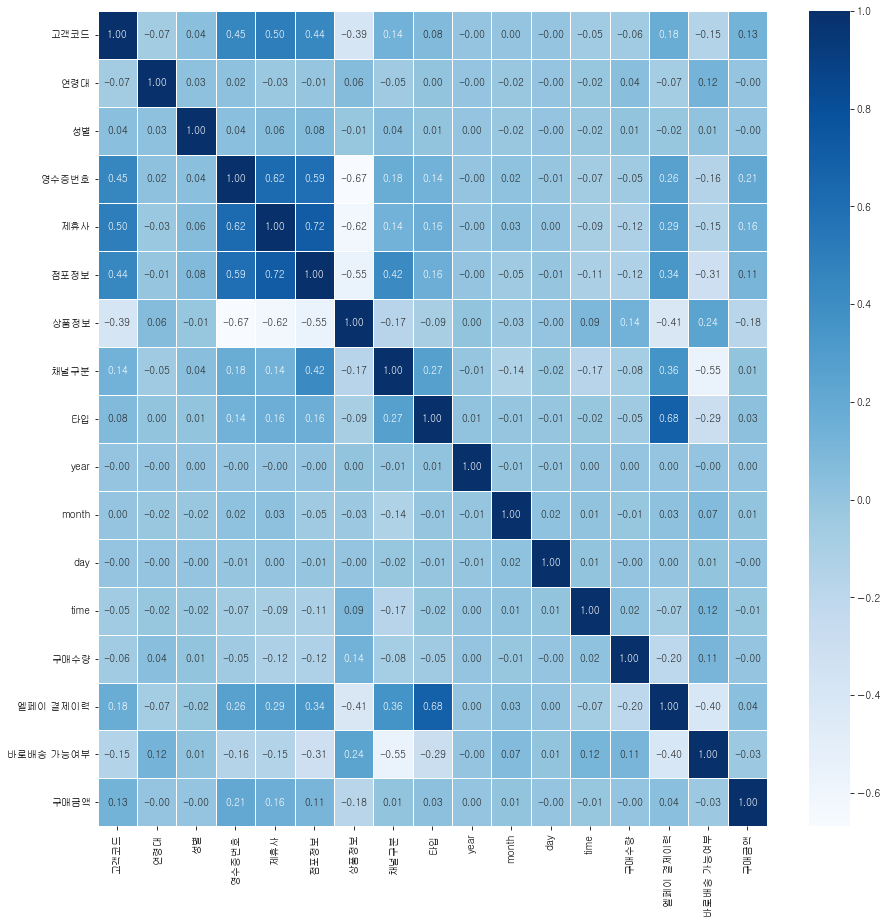

In [171]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# Modeling

In [172]:
def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

In [173]:
x_data = df.drop(['구매금액'],axis=1,inplace=False)
y_data = df['구매금액']

In [174]:
x_data

,고객코드,연령대,성별,영수증번호,제휴사,점포정보,상품정보,채널구분,타입,year,month,day,time,구매수량,엘페이 결제이력,바로배송 가능여부
0,6675,50,1,1183452,12,8319,385,1,2,2021,1,1,10,1,0,0
1,19570,40,1,1682307,12,8314,1002,1,2,2021,1,1,10,1,0,1
2,6675,50,1,1274523,12,8319,385,1,2,2021,1,1,10,1,0,0
3,6675,50,1,1274533,12,8319,385,1,2,2021,1,1,10,1,0,0
4,6675,50,1,986839,12,8319,1415,1,2,2021,1,1,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745872,10182,50,1,1589798,9,8294,629,2,3,2021,1,25,11,0,1,0
4745873,10182,50,1,755709,9,8294,629,2,3,2021,1,4,21,0,1,0
4745874,20079,30,1,1243335,3,8294,629,1,3,2021,1,19,20,0,1,0
4745875,20079,30,1,1109410,3,8294,629,1,3,2021,1,19,18,0,1,0


In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
lr = LinearRegression()

In [189]:
kfold = KFold(n_splits=10)

In [190]:
target = df['구매금액']
print(target.shape)

(4745877,)


In [192]:
feature = df.drop(['구매금액'], axis=1)
print(feature.shape)

(4745877, 16)


In [196]:
rmse = []
n_iter = 0
for train_index, test_index, in kfold.split(feature):

    x_train, x_test = feature.iloc[train_index], feature.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    # 모델 학습
    lr = lr.fit(x_train, y_train)

    # 테스트셋 예측
    pred = lr.predict(x_test)

    # 반복 횟수 1회 증가
    n_iter += 1

    error = RMSE(y_test, pred)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]

    print('\n{0}번째 교차 검증 RMSE : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, error, train_size, test_size))
    print('{0}번째 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    rmse.append(error)

print('\n==> 이 방정식의 평균 RMSE는 {}입니다.'.format(np.mean(rmse)))


1번째 교차 검증 RMSE : 554572.5230458934, 학습 데이터 크기 : 4271289, 검증 데이터 크기 : 474588
1번째 검증 세트 인덱스 : [     0      1      2 ... 474585 474586 474587]

2번째 교차 검증 RMSE : 373032.3626774108, 학습 데이터 크기 : 4271289, 검증 데이터 크기 : 474588
2번째 검증 세트 인덱스 : [474588 474589 474590 ... 949173 949174 949175]

3번째 교차 검증 RMSE : 33217.55694523333, 학습 데이터 크기 : 4271289, 검증 데이터 크기 : 474588
3번째 검증 세트 인덱스 : [ 949176  949177  949178 ... 1423761 1423762 1423763]

4번째 교차 검증 RMSE : 36318.61555938659, 학습 데이터 크기 : 4271289, 검증 데이터 크기 : 474588
4번째 검증 세트 인덱스 : [1423764 1423765 1423766 ... 1898349 1898350 1898351]

5번째 교차 검증 RMSE : 38692.9512780689, 학습 데이터 크기 : 4271289, 검증 데이터 크기 : 474588
5번째 검증 세트 인덱스 : [1898352 1898353 1898354 ... 2372937 2372938 2372939]

6번째 교차 검증 RMSE : 34485.95948176406, 학습 데이터 크기 : 4271289, 검증 데이터 크기 : 474588
6번째 검증 세트 인덱스 : [2372940 2372941 2372942 ... 2847525 2847526 2847527]

7번째 교차 검증 RMSE : 33212.92306659199, 학습 데이터 크기 : 4271289, 검증 데이터 크기 : 474588
7번째 검증 세트 인덱스 : [2847528 2847529 2847530 ... 3322113 3

In [198]:
# cross_val_score()로 구현하기
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, feature, target, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 10 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores))
print(' 10 folds 의 개별 RMSE scores : ', np.round(rmse_scores))
print(' 10 folds 의 평균 RMSE : ', np.round(avg_rmse, 3))

 10 folds 의 개별 Negative MSE scores :  [-3.07550683e+11 -1.39153144e+11 -1.10340609e+09 -1.31904184e+09
 -1.49714448e+09 -1.18928140e+09 -1.10309826e+09 -1.04524604e+09
 -2.30716501e+10 -1.07313369e+11]
 10 folds 의 개별 RMSE scores :  [554573. 373032.  33218.  36319.  38693.  34486.  33213.  32330. 151894.
 327587.]
 10 folds 의 평균 RMSE :  161534.39


In [ ]:
# 태준 진행하면서 느낀 한계점
1. 결측치
2. 목적이 지금 엘페이 사용량을 늘리고 싶어하는 건데, 
현재) 금액을 예측했을때 엘페이 사용했으니, 금액이 어느 정도 나왔다. 
방향성을 바꾸면) 엘페이를 타겟으로 했을때 금액이 어느정도인 애들은 엘페이를 쓰드라. 
>> 마케팅 전략을 세울 수 있는거야.

이 방식으로 했을 때 느낀 좋은 방향(전처리 할 때?)
>> 상품은 상품끼리, 점포 점포끼리 
전체로 묶어서 인코딩을 하는거? 각 컬럼 별로 진행하지 않고.
상품 소분류명 > 176 인코딩하면 176 column 
상품 중분류명 > 
상품 대분류명 > 

(상품코드, 상품 소분류명, 상품 중분류명, 상품 대분류명)
